### Notebook to check the working of the trained model

In [1]:
import pickle
import torch
import torchvision

In [2]:
!dir

 Volume in drive D is BRAIN 1
 Volume Serial Number is 522A-1670

 Directory of D:\Projects\virtusa\Violence-Detection\Pytorch-Implementation

15/01/2021  12:03 AM    <DIR>          .
15/01/2021  12:03 AM    <DIR>          ..
14/01/2021  11:08 PM    <DIR>          .ipynb_checkpoints
14/01/2021  11:08 PM           352,112 Mainviolence.ipynb
15/01/2021  12:11 AM    <DIR>          saved_model
15/01/2021  12:03 AM            25,572 try.ipynb
               2 File(s)        377,684 bytes
               4 Dir(s)  167,015,034,880 bytes free


In [5]:
model = pickle.load(open(r"saved_model/resnetmain.pkl","rb"))#map_location=torch.device('cpu'))

In [6]:
checkpoint = torch.load(r"saved_model/main_model.pt",map_location=torch.device('cpu'))

In [7]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [8]:
class_names = ["safe","unsafe"]

In [13]:
from PIL import Image
import torchvision.transforms as transforms

standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])

def load_input_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     standard_normalization])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [14]:
def predict_image(model, class_names, img_path):
    # load the image and return the predicted breed
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

In [15]:
import matplotlib.pyplot as plt                        
%matplotlib inline  

def run_app(img_path):
    
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
    prediction = predict_image(model, class_names, img_path)
        
    return prediction

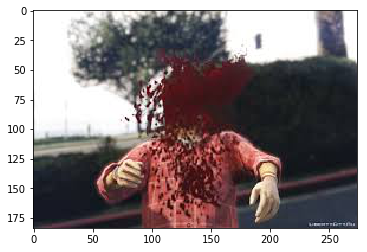

'unsafe'

In [16]:
run_app("./test_images/test1.jpg")

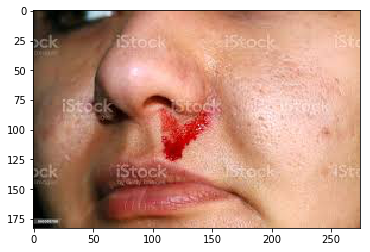

'unsafe'

In [17]:
run_app("./test_images/test2.jpg")

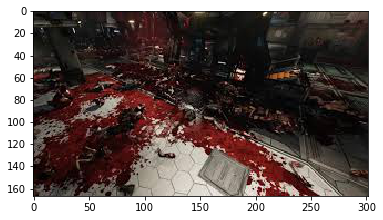

'unsafe'

In [18]:
run_app("./test_images/test3.jpg")

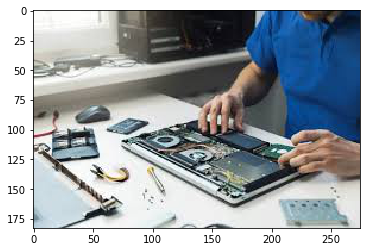

'safe'

In [19]:
run_app("./test_images/test4.jpg")

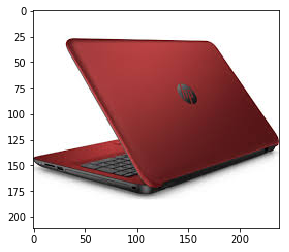

'safe'

In [20]:
run_app("./test_images/test5.jpg")

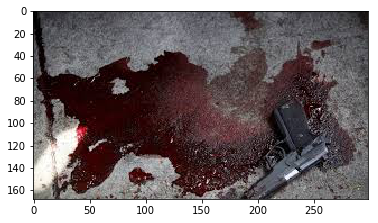

'unsafe'

In [21]:
run_app("./test_images/test6.jpg")